### 混合モデルと事後分布の推論
$N$個のデータ$\boldsymbol{X}=\{\boldsymbol{x}_1,\cdots,\boldsymbol{x}_N\}$が生成される過程を、例えば次のように記述する。
ここで、クラスタ数$K$は既知であるとする。

1. それぞれのクラスタの混合比率$\boldsymbol{\pi}=(\pi_1,\cdots,\pi_K)^T$が事前分布$p(\boldsymbol{\pi})$から生成される(ただし$\pi_k\in (0,1)$かつ$\sum_{k=1}^K\pi_k=1$)
2. それぞれのクラスタ$k=1,\cdots,K$に対する観測モデルのパラメータ$\boldsymbol{\theta}_k$(平均値や分散など)が事前分布$p(\boldsymbol{\theta}_k)$から生成される
3. $n=1,\cdots,N$に関して、$\boldsymbol{x}_n$に対応するクラスタの割り当て$\boldsymbol{s}_n$が比率$\boldsymbol{\pi}$によって選ばれる
4. $n=1,\cdots,N$に関して、$\boldsymbol{s}_n$によって選択された$k$番目の確率分布$p(\boldsymbol{x}_n|\boldsymbol{\theta}_k)$からデータ$\boldsymbol{x}_n$が生成される

このようにデータの生成過程に関する仮定をもとに構築したモデルを生成モデルと呼ぶ。
また、$\boldsymbol{s}_n$は隠れ変数(潜在変数)と呼ばれることがある。

まず、ステップ4では、最終的に取り出される点$\boldsymbol{x}_n$に対する確率分布を定義する必要がある。
これは$K$種類の確率分布を定義する必要があるが、すべてガウス分布を設定する。
$$
p(\boldsymbol{x}_n|\boldsymbol{\theta}_k)=N(\boldsymbol{x}_n|\boldsymbol{\mu}_k,\boldsymbol{\Sigma}_k),\ for\ k=1,\cdots,K
$$

ここでは観測モデルのパラメータ$\boldsymbol{\theta}_k=\{\boldsymbol{\mu}_k,\boldsymbol{\Sigma}_k\}$としている。

次にステップ3の$K$個の観測モデルを各データ点に割り当てるための手段であるが、これは$\boldsymbol{s}_n$に対して1of$K$表現を用いるのが便利である。
このような$\boldsymbol{s}_n$をサンプルするための分布としては、$\boldsymbol{\pi}$をパラメータとしたカテゴリ分布を選ぶのが自然である。
$$
p(\boldsymbol{s}_n|\boldsymbol{\pi})=Cat(\boldsymbol{s}_n|\boldsymbol{\pi})
$$
$\boldsymbol{s}_n$は$k$次元ベクトルであり、ある$k$に対して$s_{n,k}=1$が成り立つとき、$k$番目のクラスタが指定されたことを意味する。
また、どの$k$が選ばれやすいかは、この分布を支配する混合比率パラメータ$\boldsymbol{\pi}$が示す割合によって決定される。
ステップ4の分布と組み合わせると、$\boldsymbol{x}_n$を生成するための確率分布は次のような式によって表現することができる。
$$
p(\boldsymbol{x}_n|\boldsymbol{s}_n,\boldsymbol{\Theta})=\prod_{k=1}^Kp(\boldsymbol{x}_n|\boldsymbol{\theta}_k)^{s_{n,k}}
$$
ここでは、観測モデルのパラメータを$\boldsymbol{\Theta}=\{\boldsymbol{\theta}_1,\cdots,\boldsymbol{\theta}_K \}$としてまとめた。

ステップ2に関しては、ステップ4で定義した観測モデルのパラメータ$\boldsymbol{\theta}_k$に関する事前分布$p(\boldsymbol{\theta}_k)$を定義する。ここは、$p(\boldsymbol{x}_n|\boldsymbol{\theta}_k)$に対して共役性が成り立つような事前分布を設定するのが一般的である。

ステップ1の混合比率$\boldsymbol{\pi}$の事前分布に関しては、カテゴリ分布の共役事前分布である$K$次元のディリクレ分布を選ぶことにする。
$$
p(\boldsymbol{\pi})=Dir(\boldsymbol{\pi}|\boldsymbol{\alpha})
$$
ここで、各要素が正の実数値であるような$K$次元ベクトル$\boldsymbol{\alpha}$はディリクレ分布の超パラメータであり、この分布の傾向を決めるものであるが、これに関しては今回は固定値として扱う。

これらすべての確率分布を使って$N$個のデータに関する同時分布を書き下せば、モデル全体の設計図が完成する。
$$
\begin{align}
p(\boldsymbol{X},\boldsymbol{S},\boldsymbol{\Theta},\boldsymbol{\pi})&=p(\boldsymbol{X}|\boldsymbol{S},\boldsymbol{\Theta})p(\boldsymbol{S}|\boldsymbol{\pi})p(\boldsymbol{\Theta})p(\boldsymbol{\pi})\\
&=\bigl\{\prod_{n=1}^Np(\boldsymbol{x}_n|\boldsymbol{s}_n,\boldsymbol{\Theta}) \bigr\}\bigl\{\prod_{k=1}^Kp(\boldsymbol{\theta}_k) \bigr\}p(\boldsymbol{\pi})
\end{align}
$$
ここで、$\boldsymbol{S}=\{\boldsymbol{s}_1,\cdots,\boldsymbol{s}_N \}$とおいた。

### 確率分布の近似手法
#### ギブスサンプリング
ある確率分布$p(z_1,z_2,z_3)$に関して何らかの知見を得たいとしたときに、この分布から各$z_1,z_2,z_3$の実現値を複数サンプルするという手段が考えられる。
$$
z_1^{(i)},z_2^{(i)},z_3^{(i)}\sim p(z_1,z_2,z_3)\ for\ i=1,2,\cdots
$$
MCMC(Markov chain Monte Carlo)の手法の1つに分類されるギブスサンプリングは、$i$個目の各変数を次のように1つずつサンプルする。
$$
\begin{align}
z_1^{(i)}&\sim p(z_1|z_2^{(i-1)},z_3^{(i-1)})\\
z_2^{(i)}&\sim p(z_2|z_1^{(i)},z_3^{(i-1)})\\
z_3^{(i)}&\sim p(z_3|z_1^{(i)},z_2^{(i)})
\end{align}
$$
ある確率変数$z_k$をサンプルするために、すでにサンプルされた値で分布を条件付けし、よりサンプルしやすい簡単な分布を得るというアイディアである。
2次元ガウス分布$p(\boldsymbol{z})$に対してギブスサンプリングを適用した例を示す。
「1次元ガウス分布からのサンプルは容易だが、2次元ガウス分布からのサンプルは困難」であるという仮の問題設定を考えている。

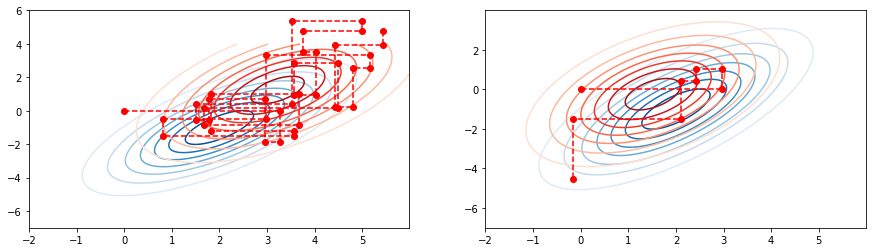

In [4]:
from scipy.stats import multivariate_normal, norm
import numpy as np
import matplotlib.pyplot as plt

def N_conditional_Gaussian(mu, sigma, c, ax='x'):
    if ax != 'x':
        mu = mu[::-1]
        sigma = np.array(sigma)[::-1,::-1]
    
    mu = np.array(mu)
    sigma = np.array(sigma)
    c = np.array(c)
    c_num = len(c)
    
    mu1 = mu[:c_num]
    mu2 = mu[c_num:]
    
    sig11 = sigma[:c_num, :c_num]
    sig12 = sigma[:c_num, c_num:]
    sig21 = sigma[c_num:, :c_num]
    sig22 = sigma[c_num:, c_num:]
    
    m1 = np.matmul(np.linalg.inv(sig11), (c-mu1))
    mu_new = mu2 + np.matmul(sig21, m1)

    v1 = np.matmul(np.linalg.inv(sig11), sig12)
    sig_new = sig22 - np.matmul(sig21, v1)

    return mu_new.tolist(), sig_new.tolist()[0]

x1 = np.arange(-2,6,0.01)
x2 = np.arange(-7,4,0.01)
X = np.array(np.meshgrid(x1, x2)).reshape(2,len(x1)*len(x2)).T

Mu = np.array([2, -1])
Sigma = np.array([[2,2],[2,4]])
Lambda = np.linalg.inv(Sigma)

y = multivariate_normal.pdf(X, Mu, np.linalg.inv(Lambda))

def gibbs_sampling_gaus2d(N=10):
    z1, z2 = [0], [0]
    for _ in range(N):
        mu, sig = N_conditional_Gaussian(Mu, Sigma, c=[z2[-1]], ax='y')
        z2.append(z2[-1])
        z1.append(norm.rvs(mu, sig))

        mu, sig = N_conditional_Gaussian(Mu, Sigma, c=[z1[-1]], ax='x')
        z1.append(z1[-1])
        z2.append(norm.rvs(mu, sig))
    Z = np.array([z1,z2]).T

    beta = 2
    m = np.array([[1],[1]])
    W = np.array([[1,0.2],[0.2,1]])
    nu = 2
    n = len(Z)

    beta_hat = beta + n
    m_hat = (np.sum(Z, axis=0).reshape(-1,1)+beta*m) / beta_hat

    W_hat_inv = Z.T@Z + beta*m@m.T - beta_hat*m_hat@m_hat.T + np.linalg.inv(W)
    W_hat = np.linalg.inv(W_hat_inv)
    nu_hat = nu + n

    Lambda_s = (1-len(m)+nu_hat)*beta_hat/(1+beta_hat)*W_hat
    y_hat = multivariate_normal.pdf(X, m_hat.T[0], np.linalg.inv(Lambda_s))
    return Z, y_hat

Z1, y_hat1 = gibbs_sampling_gaus2d(20)
Z2, y_hat2 = gibbs_sampling_gaus2d(4)

fig, ax = plt.subplots(1,2,figsize=(15,4))

ax[0].contour(x1, x2, y.reshape(len(x2),len(x1)), cmap='Blues')
ax[0].contour(x1, x2, y_hat1.reshape(len(x2),len(x1)), cmap='Reds')
ax[0].plot(Z1[:,0],Z1[:,1], 'r--o')

ax[1].contour(x1, x2, y.reshape(len(x2),len(x1)), cmap='Blues')
ax[1].contour(x1, x2, y_hat2.reshape(len(x2),len(x1)), cmap='Reds')
ax[1].plot(Z2[:,0],Z2[:,1], 'r--o')

ギブスサンプリングの最大の問題点は、複雑な事後分布の推論に対してどのくらいサンプル数が必要であるかが明確でないことである。
また、実応用では多次元の分布を取り扱うためにこのような視覚化は行えず、一般的にはサンプル点がどれだけうまく真の分布を表わせているのかは知ることはできない。
また、変数をサンプルする方法は、モデルによっては
$$
\begin{align}
z_1^{(i)}&\sim p(z_1|z_2^{(i-1)},z_3^{(i-1)})\\
z_2^{(i)},z_3^{(i)}&\sim p(z_2,z_3|z_1^{(i)})
\end{align}
$$
のように、複数の変数を同時にサンプルできる場合がある。これは、ブロッキングギブスサンプリングと呼ばれている。

#### 変分推論
変分推論(変分近似)は非常にシンプルで強力な確率分布の近似手法である。
変分推論は最適化問題を解くことによって未知の確率分布の近似的な表現を得ることを目標とする。
ある複雑な確率分布$p(z_1,z_2,z_3)$を、より簡単な近似分布$q(z_1,z_2,z_3)$で表現できないか考える。
これは、例えばKLダイバージェンスの基準を用いた次のような最小化問題としてアプローチできる。
KLダイバージェンスは2つの確率分布間の差異を表している。
$$
q_{opt}(z_1,z_2,z_3)=\arg\min_q KL[q(z_1,z_2,z_3)\| p(z_1,z_2,z_3)]
$$

制約なしに解くと、解が$q_{opt}(z_1,z_2,z_3)=p(z_1,z_2,z_3)$となってしまうので、変分理論では、近似分布$q$の表現能力を限定し、その限定された分布の中で真の事後分布$p$に最も近い分布を最適化によって探す。
典型的な使い方としては平均場近似に基づく変分理論があり、近似分布$q$に対して次のように各確率変数に独立性の仮定を置く。
$$
p(z_1,z_2,z_3)\approx q(z_1)q(z_2)q(z_3)
$$
例えば、すでに$q(z_2),q(z_3)$は与えられているとする。
このとき、最適な$q(z_1)$は次の最適化問題を解けば求められることになる。
$$
q_{opt}(z_1)=\arg\min_{q(z_1)} KL[q(z_1)q(z_2)a(z_3)\| p(z_1,z_2,z_3)]
$$
期待値計算を$\langle \rangle_{q(z_1)q(z_2)a(z_3)}=\langle \rangle_{1,2,3}$のように表すことにする。
$$
\begin{align}
KL[q(z_1)q(z_2)a(z_3)\| p(z_1,z_2,z_3)]&=-\bigl\langle\ln\frac{p(z_1,z_2,z_3)}{q(z_1)q(z_2)a(z_3)} \bigr\rangle_{1,2,3}\\
&=-\bigl\langle\langle\ln\frac{p(z_1,z_2,z_3)}{q(z_1)q(z_2)a(z_3)}\rangle_{2,3} \bigr\rangle_{1}\\
&=-\bigl\langle\langle\ln p(z_1,z_2,z_3)\rangle_{2,3}-\langle \ln q(z_1)\rangle_{2,3}-\langle \ln q(z_2)\rangle_{2,3}-\langle \ln q(z_3)\rangle_{2,3} \bigr\rangle_{1}\\
&=-\bigl\langle\langle\ln p(z_1,z_2,z_3)\rangle_{2,3}-\ln q(z_1)\bigr\rangle_{1}+const.\\
&=-\bigl\langle\ln\frac{\exp\{\langle\ln p(z_1,z_2,z_3) \rangle_{2,3} \}}{q(z_1)} \bigr\rangle_{1}+const.\\
&=KL[q(z_1)\| \exp\{\langle\ln p(z_1,z_2,z_3) \rangle_{2,3} \}]+const.
\end{align}
$$

結論として、$q(z_2)$および$q(z_3)$が与えられたとすると、最小値は次の等式によって得られることになる。
$$
\ln q(z_1)=\langle\ln p(z_1,z_2,z_3)\rangle_{q(z_2)q(z_3)}+const.
$$
同様に、$q(z_2)$や$q(z_3)$に対する最適化もまったく同じ議論になり、それぞれの近似分布に対する更新を繰り返すことにより、全体のKLダイバージェンスが更新ごとに徐々に最小化される。
平均場近似による変分理論のアルゴリズムは次のようになる。


$q(z_2),q(z_3)$を初期化  
for $i=1,\cdots,MAXIITER do$  
　$\ln q(z_1)=\langle\ln p(z_1,z_2,z_3)\rangle_{q(z_2)q(z_3)}+const.$  
　$\ln q(z_2)=\langle\ln p(z_1,z_2,z_3)\rangle_{q(z_1)q(z_3)}+const.$  
　$\ln q(z_3)=\langle\ln p(z_1,z_2,z_3)\rangle_{q(z_1)q(z_2)}+const.$  
end for

観測データ$D$が与えられた一般的な確率モデル$p(D,z_1,\cdots,z_M)$の事後分布に対する近似公式をここで用意する。
ここでは、$D$はデータ集合、各$z_1,\cdots,z_M$は未観測の変数であるとする。
また、未観測変数の集合からある$i$番目の変数$z_i$のみを除いた集合を$\boldsymbol{Z}_{/ i}$とおく。
このモデルに対する事後分布$p(z_1,\cdots,z_M|D)$を近似する場合は、条件付き分布の定義から同時分布の期待値として書くことができる。
したがって、近似分布$q(z_i)$は、ほかの近似分布$q(\boldsymbol{Z}_{/i})$が固定されたもとでは、
$$
\begin{align}
\ln q(z_i)&=\langle\ln p(z_1,\cdots,z_M|D) \rangle_{q(\boldsymbol{Z}_{/i})}+const.\\
&=\langle\ln p(D,z_1,\cdots,z_M) \rangle_{q(\boldsymbol{Z}_{/i})}+const.
\end{align}
$$
として求めることができる。

In [77]:
def variable_inference_gaus2d(N=10):
    z1, z2 = [0], [0]
    sig1, sig2 = [0], [0]
    for _ in range(N):
        mu, sig = N_conditional_Gaussian(Mu, Sigma, c=[z2[-1]], ax='y')
        z2.append(z2[-1])
        z1.append(mu[0])
        sig1.append(sig[0])

        mu, sig = N_conditional_Gaussian(Mu, Sigma, c=[z1[-1]], ax='x')
        z1.append(z1[-1])
        z2.append(mu[0])
        sig2.append(sig[0])
    Z = np.array([z1,z2]).T
    
    m_hat = np.array([z1[-1],z2[-1]])
    sig_hat= np.array([[sig1[-1],0],[0,sig2[-1]]])
    y_hat = multivariate_normal.pdf(X, m_hat, sig_hat)
    
    KL = -np.sum(y/np.sum(y) * np.log((y_hat/np.sum(y_hat))/(y/np.sum(y))))
    
    return y_hat, m_hat, KL

KL:  0.778376175737831
KL:  0.5943887151483348
KL:  0.5812656300791327
KL:  0.5798387796431893


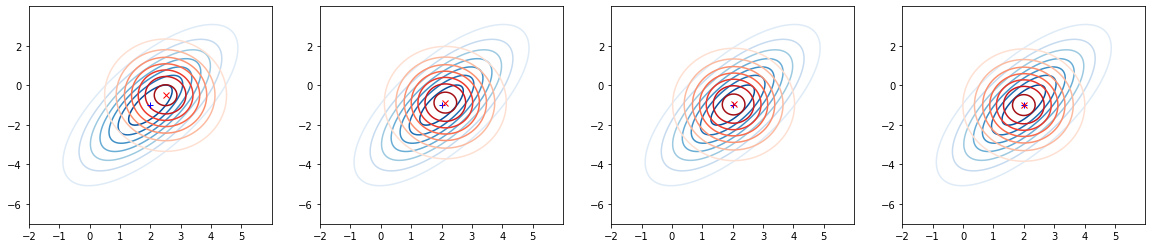

In [78]:
fig, ax = plt.subplots(1,4,figsize=(20,4))

for i, n in enumerate([1,3,5,10]):
    y_hat, m_hat, KL = variable_inference_gaus2d(n)
    print('KL: ',KL)
    ax[i].contour(x1, x2, y.reshape(len(x2),len(x1)), cmap='Blues')
    ax[i].contour(x1, x2, y_hat.reshape(len(x2),len(x1)), cmap='Reds')
    ax[i].plot(Mu[0], Mu[1], '+', color='blue')
    ax[i].plot(m_hat[0], m_hat[1], 'x', color='red')

### ポアソン混合モデルにおける推論
#### ポアソン混合モデル
ポアソン混合モデルは多峰性の離散非負データを学習する際に利用できる。
パラメータは$\boldsymbol{\lambda}=\{\lambda_1,\cdots,\lambda_K\}$とし、あるクラスタ$k$に対する観測モデルとして、次のようなポアソン分布を採用する。
$$
p(x_n|\lambda_k)=Poi(x_n|\lambda_k)
$$
したがって、混合分布における条件付き分布$p(x_n|\boldsymbol{s}_n,\boldsymbol{\lambda})$は次のようになる。
$$
p(x_n|\boldsymbol{s}_n,\boldsymbol{\lambda})=\prod_{k=1}^KPoi(x_n|\lambda_k)^{\boldsymbol{s}_n,k}
$$
ポアソン分布のパラメータ$\boldsymbol{\lambda}=\{\lambda_1,\cdots,\lambda_K\}$に対して事前分布は、共役事前分布であるガンマ分布を用いる。
$$
p(\lambda_k)=Gam(\lambda_k|a,b)
$$
$a,b$は事前に固定値を与えられた超パラメータである。

#### ギブスサンプリング
ギブスサンプリングを使って、ポアソン混合モデルの事後分布からパラメータ$\boldsymbol{\lambda},\boldsymbol{\pi}$と潜在変数$\boldsymbol{S}$をサンプルするアルゴリズムを導出する。
$\boldsymbol{X}$が観測されたあとの条件付き分布は
$$
p(\boldsymbol{S},\boldsymbol{\lambda},\boldsymbol{\pi}|\boldsymbol{X})
$$
となる。
混合分布では、潜在変数とパラメータを分けてサンプリングすると十分に簡単な確率分布が得られることが知られている。
$$
\begin{align}
\boldsymbol{S}&\sim p(\boldsymbol{S}|\boldsymbol{X},\boldsymbol{\lambda},\boldsymbol{\pi})\\
\boldsymbol{\lambda},\boldsymbol{\pi}&\sim p(\boldsymbol{\lambda},\boldsymbol{\pi}|\boldsymbol{X},\boldsymbol{S})
\end{align}
$$
はじめに、$\boldsymbol{S}=\{\boldsymbol{s}_1,\cdots,\boldsymbol{s}_N\}$をサンプルするための条件付き分布を求める。
$$
\begin{align}
p(\boldsymbol{S}|\boldsymbol{X},\boldsymbol{\lambda},\boldsymbol{\pi})&\propto p(\boldsymbol{X},\boldsymbol{S},\boldsymbol{\lambda},\boldsymbol{\pi})\\
&\propto p(\boldsymbol{X}|\boldsymbol{S},\boldsymbol{\lambda})p(\boldsymbol{S}|\boldsymbol{\pi})\\
&=\prod_{n=1}^Np(x_n|\boldsymbol{s}_n,\boldsymbol{\lambda})p(\boldsymbol{s}_n|\boldsymbol{\pi})
\end{align}
$$
$p(\boldsymbol{S}|\boldsymbol{X},\boldsymbol{\lambda},\boldsymbol{\pi})$は各$\boldsymbol{s}_1,\cdots,\boldsymbol{s}_N$の独立した分布に分解できることが分かる。データとパラメータが与えられたもとでは、それぞれの$\boldsymbol{s}_n$が独立にサンプルできることを意味する。
$\boldsymbol{s}_n$をサンプルするための確率分布を計算する。
$$
\begin{align}
\ln p(x_n|\boldsymbol{s}_n,\boldsymbol{\lambda})&=\sum_{k=1}^Ks_{n,k}\ln Poi(x_n|\lambda_k)\\
&=\sum_{k=1}^Ks_{n,k}(x_n\ln \lambda_k-\lambda_k)+const.
\end{align}
$$
であり、
$$
\begin{align}
\ln p(\boldsymbol{s}_n|\boldsymbol{\pi})&=\ln Cat(\boldsymbol{s}_n|\boldsymbol{\pi})\\
&=\sum_{k=1}^Ks_{n,k}\ln \pi_k
\end{align}
$$
となるため、２つを合わせれば結果として
$$
\ln p(x_n|\boldsymbol{s}_n,\boldsymbol{\lambda})p(\boldsymbol{s}_n|\boldsymbol{\pi})=\sum_{k=1}^Ks_{n,k}(x_n\ln \lambda_k-\lambda_k+\ln\pi_k)+const.
$$
となる。制約$\sum_{k=1}^Ks_{n,k}=1$を考慮すれば、これは$\boldsymbol{s}_n$に関するカテゴリ分布に対数を取ったものとなるので、簡易表記のため新たなパラメータ$\boldsymbol{\eta}_n$を用意すると次のようにまとめることができる。
$$
\boldsymbol{s}_n\sim Cat(\boldsymbol{s}_n|\boldsymbol{\eta}_n)\\
ただし \eta_{n,k}\propto \exp\{x_n\ln\lambda_k-\lambda_k+\ln\pi_k \}\\
\biggl(s.t.\ \sum_{k=1}^K\eta_{n,k}=1 \biggr)
$$
各$\boldsymbol{s}_n$に対して各$\eta_{n,k}$を計算することにより、カテゴリ分布から$\boldsymbol{s}_n$がサンプルできることになる。
$\boldsymbol{S}$がすべて観測された値のように扱うことで分布が得られる。
$$
\begin{align}
p(\boldsymbol{\lambda},\boldsymbol{\pi}|\boldsymbol{X},\boldsymbol{S})&\propto p(\boldsymbol{X},\boldsymbol{S},\boldsymbol{\lambda},\boldsymbol{\pi})\\
&=p(\boldsymbol{X}|\boldsymbol{S},\boldsymbol{\lambda})p(\boldsymbol{S}|\boldsymbol{\pi})p(\boldsymbol{\lambda})p(\boldsymbol{\pi})
\end{align}
$$
$\boldsymbol{\lambda}$に関する項と$\boldsymbol{\pi}$に関する項は別々に分解できる。
はじめに$\boldsymbol{\lambda}$の分布から計算する。対数を取ることによって
$$
\begin{align}
\ln p(\boldsymbol{X}|\boldsymbol{S},\boldsymbol{\lambda})p(\boldsymbol{\lambda})&=\sum_{n=1}^N\sum_{k=1}^Ks_{n,k}\ln Poi(x_n|\lambda_k)+\sum_{k=1}^K\ln Gam(\lambda_k|a,b)\\
&=\sum_{k=1}\{(\sum_{n=1}^Ns_{n,k}x_n+a-1)\ln \lambda_k-(\sum_{n=1}^Ns_{n,k}+b)\lambda_k \}+const.
\end{align}
$$
ということになり、$\boldsymbol{\lambda}$に関してはつぎのようにそれぞれ独立した$K$個のガンマ分布からサンプルすればよいことになる。
$$
\begin{align}
\lambda_k&\sim Gam(\lambda_k|\hat{a}_k,\hat{b}_k)\\
ただし\hat{a}_k&=\sum_{n=1}^Ns_{n,k}x_n+a\\
\hat{b}_k&=\sum_{n=1}^Ns_{n,k}+b
\end{align}
$$
一方、$\boldsymbol{\pi}$の分布に関しては
$$
\begin{align}
\ln p(\boldsymbol{S}|\boldsymbol{\pi})p(\boldsymbol{\pi})&=\sum_{n=1}^N\ln Cat(\boldsymbol{s}_n|\boldsymbol{\pi})+\ln Dir(\boldsymbol{\pi}|\boldsymbol{\alpha})\\
&=\sum_{k=1}^K(\sum_{n=1}^Ns_{n,k}+\alpha_k-1)\ln\pi_k+const.
\end{align}
$$
となるため、$\boldsymbol{\pi}$は以下のディリクレ分布からサンプルできることになる。
$$
\begin{align}
\boldsymbol{\pi}&\sim Dir(\boldsymbol{\pi}|\hat{\boldsymbol{\alpha}})\\
ただし\hat{\alpha}_k=\sum_{n=1}^Ns_{n,k}+\alpha_k
\end{align}
$$

ポアソン混合モデルのためのギブスサンプリングは次のようになる。

パラメータのサンプル$\boldsymbol{\lambda},\boldsymbol{\pi}$に初期値を設定  
for $i=1,\cdots,MAXITER$ do  
　for $n=1,\cdots,N$ do  
　　$\boldsymbol{s}_n$をサンプル  
　end for  
　for $k=1,\cdots,K$ do  
　　$\lambda_k$をサンプル  
　end for  
　$\boldsymbol{\pi}$をサンプル  
end for
　


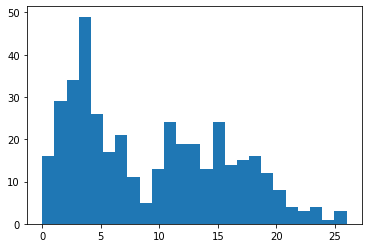

In [491]:
from scipy.stats import poisson

test1 = poisson.rvs(size=200, mu=4)
test2 = poisson.rvs(size=200, mu=15)
x = np.concatenate([test1, test2])
plt.hist(x, bins=25);

lambda: [ 3.89334483 14.26080021]
pi: [[0.45752245 0.54247755]]


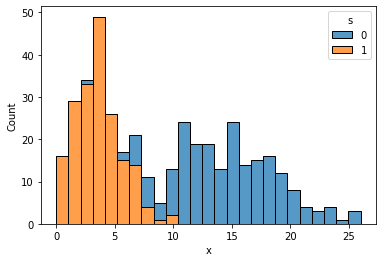

In [492]:
import pandas as pd
import seaborn as sns
from scipy.stats import multinomial, gamma, dirichlet

x = x.reshape(-1,1)

# 初期値の設定
lmd = np.array([[2,3]])
pi = np.array([[0.5,0.5]])
a = np.array([[1,1]])
b = np.array([[1,1]])
alpha = np.array([[1,1]])

for _ in range(100):
    eta = np.exp(x*np.log(lmd)-lmd+np.log(pi))
    eta = eta / eta.sum(axis=1).reshape(-1,1)
    s = np.array([multinomial.rvs(n=1, p=eta[i]) for i in np.arange(len(eta))])

    a = np.sum(s*x, axis=0) + a
    b = np.sum(s, axis=0) + b
    lmd = gamma.rvs(a=a, scale=1/b)

    alpha = np.sum(s, axis=0) + alpha
    pi = dirichlet.rvs(alpha=alpha[0])

print('lambda:', lmd)    
print('pi:', pi)    

x_df = pd.DataFrame({'x':x.ravel(),'s':s[:,0].ravel()})
sns.histplot(data=x_df, x="x", hue="s", multiple="stack", bins=25);

#### 変分理論
ここでは、次のように、潜在変数とパラメータを分けることによって、事後分布を近似することを目指す。
$$
p(\boldsymbol{S},\boldsymbol{\lambda},\boldsymbol{\pi}|\boldsymbol{X})\approx q(\boldsymbol{S})q(\boldsymbol{\lambda},\boldsymbol{\pi})
$$
このように潜在変数とパラメータ分布を分けて近似する手続きを、特に変分ベイズEMアルゴリズムと呼ぶ。
はじめに$q(\boldsymbol{S})$に対して先ほど導出した変分理論の公式を当てはめる。
$$
\begin{align}
\ln q(\boldsymbol{S})&=\langle\ln p(\boldsymbol{X},\boldsymbol{S},\boldsymbol{\lambda},\boldsymbol{\pi}) \rangle_{q(\boldsymbol{\lambda},\boldsymbol{\pi})}+const.\\
&=\langle\ln p(\boldsymbol{X}|\boldsymbol{S},\boldsymbol{\lambda}) \rangle_{q(\boldsymbol{\lambda})}+\langle\ln p(\boldsymbol{S}|\boldsymbol{\pi}) \rangle_{q(\boldsymbol{\lambda})}+const.\\
&=\sum_{n=1}^N\{\langle \ln p(x_n|\boldsymbol{s}_n,\boldsymbol{\lambda}) \rangle_{q(\boldsymbol{\lambda})}+\langle \ln p(\boldsymbol{s}_n|\boldsymbol{\pi}) \rangle_{q(\boldsymbol{\pi})} \}+const.
\end{align}
$$
それぞれの期待期の項は
$$
\begin{align}
\langle \ln p(x_n|\boldsymbol{s}_n,\boldsymbol{\lambda}) \rangle_{q(\boldsymbol{\lambda})}&=\sum_{k=1}^K\langle s_{n,k}\ln Poi(x_n|\lambda_k)\rangle_{q(\lambda_k)}\\
&=\sum_{k=1}^Ks_{n,k}(x_n\langle\ln \lambda_k\rangle-\langle\lambda_k \rangle)+const.
\end{align}
$$
および、
$$
\begin{align}
\langle \ln p(\boldsymbol{s}_n|\boldsymbol{\pi}) \rangle_{q(\boldsymbol{\pi})}&=\langle\ln Cat(\boldsymbol{s}_n|\boldsymbol{\pi}) \rangle_{q(\boldsymbol{\pi})}\\
&=\sum_{k=1}^Ks_{n,k}\langle\ln \pi_k \rangle
\end{align}
$$
であるため、$\boldsymbol{s}_n$の近似分布は次のようなカテゴリ分布になることがわかる。
$$
q(\boldsymbol{s}_n)=Cat(\boldsymbol{s}_n|\boldsymbol{\eta}_n)\\
ただし\eta_{n,k}\propto \exp\{x_n\langle\ln\lambda_k \rangle-\langle\lambda_k \rangle+\langle\ln\pi_k \rangle \}\\
\biggl(s.t.\ \sum_{k=1}^K\eta_{n,k}=1 \biggr)
$$
この更新式を完成させるためには、$\boldsymbol{\lambda}$や$\boldsymbol{\pi}$に対する各種の期待値計算が必要となる。
次にパラメータに対する近似分布の更新式を求める。
同様の流れで変分理論の公式を適用する。
$$
\begin{align}
\ln q(\boldsymbol{\lambda},\boldsymbol{\pi})&=\langle p(\boldsymbol{X},\boldsymbol{S},\boldsymbol{\lambda},\boldsymbol{\pi}) \rangle_{q(\boldsymbol{S})}+const.\\
&=\langle p(\boldsymbol{X}|\boldsymbol{S},\boldsymbol{\lambda}) \rangle_{q(\boldsymbol{S})}+\ln p(\boldsymbol{\lambda})+\langle p(\boldsymbol{S}|\boldsymbol{\pi})\rangle_{q(\boldsymbol{S})}+\ln p(\boldsymbol{\pi})+const.
\end{align}
$$
$\boldsymbol{\lambda}$に関する項のみを取り出して計算すると、
$$
\begin{align}
\ln q(\boldsymbol{\lambda})&=\sum_{n=1}^N\langle \sum_{k=1}^Ks_{n,k}\ln Poi(x_n|\lambda_k)\rangle_{q(\boldsymbol{s}_n)}+sum_{k=1}^K\ln Gam(\lambda_k|a,b)+const.\\
&=\sum_{k=1}^K\{(\sum_{n=1}^N\langle s_{n,k} \rangle x_n+a-1)\ln\lambda_k-(\sum_{n=1}^N\langle s_{n,k} \rangle + b)\lambda_k \}
\end{align}
$$
となるので、$\boldsymbol{\lambda}$の近似事後分布はさらに$K$個の独立な分布に分けられることが分かる。
$$
\begin{align}
q(\lambda_k)&=Gam(\lambda_k|\hat{a}_k,\hat{b}_k)\\
ただし、\hat{a}_k&=\sum_{n=1}^N\langle s_{n,k} \rangle x_n+a\\
\hat{b}_k&=\sum_{n=1}^N\langle s_{n,k} \rangle + b
\end{align}
$$
次に、$\boldsymbol{\pi}$に関係する項のみを取り出して計算すると
$$
\begin{align}
\ln p(\boldsymbol{\pi})&=\sum_{n=1}^N\langle \ln Cat(\boldsymbol{s}_n|\boldsymbol{\pi}) \rangle_{q(\boldsymbol{s}_n)}+\ln Dir(\boldsymbol{\pi}|\boldsymbol{\alpha})+const.\\
&=\sum_{k=1}^K(\sum_{n=1}^N\langle s_{n,k} \rangle + \alpha_k - 1)\ln \pi_k + const.
\end{align}
$$
となり、次のようなディリクレ分布が得られる。
$$
\begin{align}
q(\boldsymbol{\pi})&=Dir(\boldsymbol{\pi}|\hat{\boldsymbol{\alpha}})\\
ただし\hat{\alpha}_k&=\sum_{n=1}^N\langle s_{n,k} \rangle+\alpha_k
\end{align}
$$

期待値$\langle s_{n,k} \rangle = \langle s_{n,k} \rangle_{q(\boldsymbol{s}_n)}$は、単純に$q(\boldsymbol{s}_n)$の平均パラメータになる。
$$
\langle s_{n,k} \rangle = \eta_{n,k}
$$
同様に、
$$
\begin{align}
\langle \lambda_k \rangle&=\frac{\hat{a}_k}{\hat{b}_k}\\
\langle \ln\lambda_k \rangle&=\psi(\hat{a}_k)-\ln \hat{b}_k\\
\langle \ln\pi_k \rangle &= \psi(\hat{a}_k)-\psi(\sum_{i=1}^K\hat{a}_i)
\end{align}
$$

ポアソン混合モデルに対する変分推論アルゴリズムは次のようになる。

$q(\boldsymbol{\lambda}),q(\boldsymbol{\pi})$を初期化  
for $i=1,\cdots,MAXITER$ do  
　for $n=1,\cdots,N$ do  
　　$q(\boldsymbol{s}_n$)を更新 
　end for  
　for $k=1,\cdots,K$ do  
　　q($\lambda_k$)を更新
　end for  
　q($\boldsymbol{\pi}$)を更新
end for
　

lambda: [[ 3.76238627 13.93241375]]
pi: [[0.44113992 0.55886008]]


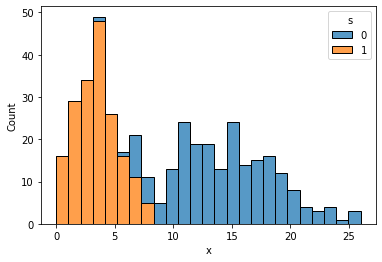

In [493]:
from scipy.special import digamma # ディガンマ関数

# 初期値の設定
a = np.array([[1,2]])
b = np.array([[1,1]])
alpha = np.array([[1,1]])
lmd = a / b
ln_lmd = digamma(a) - np.log(b)
ln_pi = digamma(alpha) - digamma(np.sum(alpha))

for _ in range(100):
    eta = np.exp(x*ln_lmd-lmd+ln_pi)
    eta = eta / eta.sum(axis=1).reshape(-1,1)
    s = np.array([multinomial.rvs(n=1, p=eta[i]) for i in np.arange(len(eta))])
    
    s_mean = eta
    
    a = np.sum(s_mean*x, axis=0) + a
    b = np.sum(s_mean, axis=0) + b
    lmd = gamma.rvs(a=a, scale=1/b)

    alpha = np.sum(s_mean, axis=0) + alpha
    pi = dirichlet.rvs(alpha=alpha[0])
    
    lmd = a / b
    ln_lmd = digamma(a) - np.log(b)
    ln_pi = digamma(alpha) - digamma(np.sum(alpha))

print('lambda:', lmd)    
print('pi:', pi)    

x_df = pd.DataFrame({'x':x.ravel(),'s':s[:,0].ravel()})
sns.histplot(data=x_df, x="x", hue="s", multiple="stack", bins=25);

#### 崩壊型ギブスサンプリング
同時分布からパラメータを周辺化除去することを考える。
$$
p(\boldsymbol{X},\boldsymbol{S})=\int\int p(\boldsymbol{X},\boldsymbol{S},\boldsymbol{\lambda},\boldsymbol{\pi})d\boldsymbol{\lambda}\boldsymbol{\pi}
$$
ひとたびパラメータを周辺化してしまえば、あとは$\boldsymbol{S}$を$p(\boldsymbol{S}\mid\boldsymbol{X})$からサンプルできればよく、パラメータの事後分布などは必要に応じてサンプルされた$\boldsymbol{S}$から計算できる。

ここでは周辺化されたモデルの事後分布$p(\boldsymbol{S}\mid\boldsymbol{X})$に対してギブスサンプリングを適用し、各$\boldsymbol{s}_1,\cdots,\boldsymbol{s}_N$がそれぞれバラバラにサンプルできないか検討する。
あるサンプルしたい変数$\boldsymbol{s}_n$以外のすべての潜在変数の集合を$\boldsymbol{S}_{\backslash n}=\{\boldsymbol{s}_1,\cdots,\boldsymbol{s}_{n-1},\boldsymbol{s}_{n+1},\cdots,\boldsymbol{s}_N \}$としたときに、条件付き分布$p(\boldsymbol{s}_n\mid \boldsymbol{X},\boldsymbol{S}_{\backslash n})$が十分簡単な確率分布として得られればよい。
計算を進めると、
$$
\begin{align}
p(\boldsymbol{s}_n\mid\boldsymbol{X},\boldsymbol{S}_{\backslash n})&\propto p(x_n,\boldsymbol{X}_{\backslash n},\boldsymbol{s}_n,\boldsymbol{S}_{\backslash n})\\
&=p(x_n\mid \boldsymbol{X}_{\backslash n},\boldsymbol{s}_n,\boldsymbol{S}_{\backslash n})p(\boldsymbol{X}_{\backslash n}\mid \boldsymbol{s}_n,\boldsymbol{S}_{\backslash n})p(\boldsymbol{s}_n\mid \boldsymbol{S}_{\backslash n})p(\boldsymbol{S}_{\backslash n})\\
&\propto p(x_n|\boldsymbol{X}_{\backslash n},\boldsymbol{s}_n,\boldsymbol{S}_{\backslash n})p(\boldsymbol{s}_n\mid \boldsymbol{S}_{\backslash n})
\end{align}
$$
この式は下記の2つの項に分解されることがわかる。
$$
p(\boldsymbol{s}_n\mid \boldsymbol{S}_{\backslash n})\\
p(x_n\mid \boldsymbol{X}_{\backslash n},\boldsymbol{s}_n,\boldsymbol{S}_{\backslash n})
$$
今計算したいのは$\boldsymbol{s}_n$に関する離散分布である。
これら2つの式に対して各$k$で$s_{n,k}=1$となる場合の値を計算し、最後に足して1になるように正規化すれば、$\boldsymbol{s}_n$をサンプルするための確率が得られる。
まず、1つ目の式は次のような$\boldsymbol{s}_n$の予測分布であると解釈することができる。
$$
p(\boldsymbol{s}_n\mid \boldsymbol{S}_{\backslash n})=\int p(\boldsymbol{s}_n\mid\boldsymbol{\pi})p(\boldsymbol{\pi}\mid\boldsymbol{S}_{\backslash n})d\boldsymbol{\pi}
$$
ベイズの定理を適用すると
$$
p(\boldsymbol{\pi}\mid \boldsymbol{S}_{\backslash n})\propto p(\boldsymbol{S}_{\backslash n}\mid \boldsymbol{\pi})p(\boldsymbol{\pi})
$$
となり、この分布は$K$次元ベクトル$\hat{\boldsymbol{\alpha}}_{\backslash n}$をパラメータをした次のようなディリクレ分布になる。
$$
p(\boldsymbol{\pi}\mid \boldsymbol{S}_{\backslash n})=Dir(\boldsymbol{\pi}\mid \hat{\boldsymbol{\alpha}}_{\backslash n})\\
ただし\hat{\alpha}_{\backslash n,k}=\sum_{n'\neq n}s_{n',k}+\alpha_k
$$
$p(\boldsymbol{s}_n\mid \boldsymbol{S}_{\backslash n})$として、$K$次元ベクトル$\boldsymbol{\eta}_{\backslash n}$をパラメータとした次のようなカテゴリ分布が得られる。
$$
\begin{align}
p(\boldsymbol{s}_n\mid \boldsymbol{S}_{\backslash n})&=\int Cat(\boldsymbol{s}_n\mid \boldsymbol{\pi})Dir(\boldsymbol{\pi}\mid\hat{\boldsymbol{\alpha}}_{\backslash n}d\boldsymbol{\pi})\\
&=Cat(\boldsymbol{s}_n\mid \boldsymbol{\eta}_{\backslash n})\\
ただし\eta_{\backslash n,k}&\propto \hat{\alpha}_{\backslash n,k}
\end{align}
$$
2つ目の式について、次のような予測分布のようなものを計算する問題となる。
$$
p(x_n\mid \boldsymbol{X}_{\backslash n},\boldsymbol{s}_n,\boldsymbol{S}_{\backslash n})=\int p(x_n\mid \boldsymbol{s}_n,\boldsymbol{\lambda})p(\boldsymbol{\lambda}\mid \boldsymbol{X}_{\backslash n},\boldsymbol{S}_{\backslash n})d\boldsymbol{\lambda}
$$
まず、右側の項のある種の事後分布のようなものを計算する。ベイズの定理により
$$
p(\boldsymbol{\lambda\mid \boldsymbol{X}_{\backslash n},\boldsymbol{S}_{\backslash n}})\propto p(\boldsymbol{X}_{\backslash n}\mid \boldsymbol{S}_{\backslash n},\boldsymbol{\lambda})p(\boldsymbol{\lambda})
$$
となるため、対数を使って計算すると
$$
\begin{align}
\ln p(\boldsymbol{X}_{\backslash n}\mid \boldsymbol{S}_{\backslash n},\boldsymbol{\lambda})p(\boldsymbol{\lambda})&=\sum_{n'\neq n}\sum_{k=1}^Ks_{n',k}\ln Poi(x_n'|\lambda_k)+\sum_{k=1}^K\ln Gam(\lambda_k\mid a,b)\\
&=\sum_{k=1}^K\{(\sum_{n'=n})s_{n',k}x_{n'}+a-1)\ln\lambda_k - (\sum_{n'\neq n}s_{n',k}+b)\lambda_k \}+const.
\end{align}
$$
であるため、事前分布と同様、ガンマ分布になることがわかる。
$$
\begin{align}
p(\boldsymbol{\lambda}\mid \boldsymbol{X}_{\backslash n},\boldsymbol{S}_{\backslash n})&=\prod_{k=1}^KGam(\lambda_k\mid \hat{a}_{\backslash n,k}\hat{b}_{\backslash n,k})\\
ただし\hat{a}_{\backslash n,k}&=\sum_{n'\neq n}s_{n',k}x_{n'}+a\\
\hat{b}_{\backslash n,k}&=\sum_{n'\neq n}s_{n',k}+b
\end{align}
$$
この分布を用いてパラメータ$\boldsymbol{\lambda}$を積分除去し、$x_n$に対するある種の予測分布を計算する。
ある$k$に対して$s_{n,k}=1$となる場合のみを考えれば、次のように解析的に積分ができる。
$$
\begin{align}
p(x_n\mid \boldsymbol{X}_{\backslash n},s_{n,k}=1,\boldsymbol{S}_{\backslash n})&=\int p(x_n\mid \lambda_k)p(\lambda_k\mid \boldsymbol{X}_{\backslash n},\boldsymbol{S}_{\backslash n})d\lambda_k\\
&=NB(x_n\mid \hat{a}_{\backslash n,k},\frac{1}{\hat{b}_{\backslash n,k}+1})
\end{align}
$$
この確率分布から$\boldsymbol{s}_n$をサンプルするためには、$\boldsymbol{s}_n$のそれぞれに対する実現値($\boldsymbol{s}_n=(1,0,\cdots,0)^T$から$\boldsymbol{s}_n=(0,0,\cdots,0,1)^T$)までを評価し、得られた$K$個の値で正規化すれば$\boldsymbol{s}_n$をサンプルするためのカテゴリ分布が得られる。
公開型ギブスサンプリングはその特性上、各$n$番目のデータ点ごとにサンプリングを行うので、毎回のサンプリングに関して$N-1$個のデータや潜在変数に関する足し合わせを実行する必要はない。ある$i$番目のサンプルを得た直後に、$j$番目のサンプルを得たいとしたときに、$p(\boldsymbol{\pi}\mid \boldsymbol{S}_{\backslash n})$の計算は、
$$
\hat{\alpha}_{\backslash j,k}=\hat{\alpha}_{\backslash i,k}+s_{i,k}-s_{j,k}
$$
とすることができる。
$p(\boldsymbol{\lambda}\mid \boldsymbol{X}_{\backslash n},\boldsymbol{S}_{\backslash n})$に関しても同様で、次のように書ける。
$$
\begin{align}
\hat{a}_{\backslash j,k}&=\hat{a}_{\backslash i,k}+s_{i,k}x_i-s_{j,k}x_j\\
\hat{b}_{\backslash j,k}&=\hat{b}_{\backslash j,k}+s_{i,k}-s_{j,k}
\end{align}
$$
実装上は、$N$個分のデータによって計算される$\hat{\alpha}_k,\hat{a}_k,\hat{b}_k$を変数上で保持しておく。
新しい$\boldsymbol{s}_n$をサンプルする直前で、以前の$n$番目のデータに関わる量を$\hat{\alpha}_k,\hat{a}_k,\hat{b}_k$から一時的に引いておき、$\boldsymbol{s}_n$をサンプルしたあとで新たに得られた量を加えなおす。

ポアソン混合モデルに対する崩壊型ギブスサンプリングのアルゴリズムは次のようになる。

潜在変数のサンプル$\boldsymbol{s}_1,\cdots,\boldsymbol{s}_N$に初期値を設定  
$\hat{\boldsymbol{\alpha}},\hat{a},\hat{b}$を計算
for $i=1,\cdots,MAXITER$ do  
　for $n=1,\cdots,N$ do  
　　$x_n$に関する統計量を除去  
　　for $k=1,\cdots,K$ do  
　　　$p(x_n\mid \boldsymbol{X}_{\backslash n},s_{n,k}=1,\boldsymbol{S}_{\backslash n})$を計算  
　　end for  
　　$p(\boldsymbol{s}_n\mid \boldsymbol{S}_{\backslash n})$および$p(x_n\mid \boldsymbol{X}_{\backslash n},\boldsymbol{s}_n,\boldsymbol{S}_{\backslash n})$を用いて$\boldsymbol{s}_n$をサンプル  
　　$\hat{\alpha}_{\backslash j,k}=\hat{\alpha}_{\backslash i,k}+s_{i,k}-s_{j,k}$および$\hat{a}_{\backslash j,k}=\hat{a}_{\backslash i,k}+s_{i,k}x_i-s_{j,k}x_j,\ \hat{b}_{\backslash j,k}=\hat{b}_{\backslash j,k}+s_{i,k}-s_{j,k}$を用いて$x_n$に関する統計量を追加  
　end for  
end for

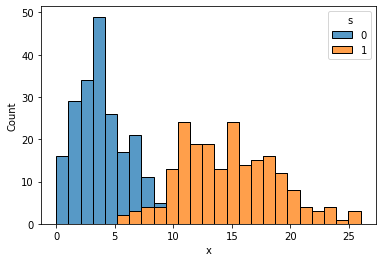

In [497]:
from scipy.stats import nbinom

a = np.array([[2,1]])
b = np.array([[1,1]])
alpha = np.array([[1,2]])

S = multinomial.rvs(n=1, size=len(x), p=[0.5, 0.5])

alpha = np.sum(S, axis=0) + alpha
a = np.sum(x*S, axis=0) + a
b = np.sum(S, axis=0) + b

for _ in range(100):
    for n in range(len(x)):
        alpha = alpha - S[n]
        a = a - x[n]*S[n]
        b = b - S[n]

        p_xn = nbinom.pmf(k = x[n], n=a, p=1-1/(b+1))

        eta = alpha / alpha.sum()
        p_xn = (p_xn+1e-8) * eta
        p_xn = p_xn / p_xn.sum()
        #s = multinomial.rvs(n=1, p=p_xn[0])
        s = np.random.multinomial(n=1, pvals=p_xn[0], size=1)
        
        alpha = alpha + s
        a = a + x[n]*s
        b = b + s
        
        S[n] = s

x_df = pd.DataFrame({'x':x.ravel(),'s':S[:,0].ravel()})
sns.histplot(data=x_df, x="x", hue="s", multiple="stack", bins=25);

### ガウス混合モデルにおける推論
#### ガウス混合モデル
各クラスタ$k$におけるデータ$\boldsymbol{x}_n\in R^D$の観測モデルとしてガウス分布を用いる。
パラメータを$\boldsymbol{\theta}_k=\{\boldsymbol{\mu}_k,\boldsymbol{\Lambda}\}$とすれば、観測モデルは
$$
p(\boldsymbol{x}_n|\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k)=N(\boldsymbol{x}_n|\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k^{-1})
$$
と書くことができる。各パラメータは$\boldsymbol{\mu}_k\in R^D, \boldsymbol{\Lambda}_k^{-1}\in R^{D\times D}$となる。
したがって、潜在変数も含めた条件付き分布は次のように書ける。
$$
p(\boldsymbol{x}_n|\boldsymbol{s}_n,\boldsymbol{\mu},\boldsymbol{\Lambda})=\prod_{k=1}^KN(\boldsymbol{x}_n|\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k^{-1})^{s_{n,k}}
$$
ただし、$\boldsymbol{\mu}=\{\boldsymbol{\mu}_1,\cdots,\boldsymbol{\mu}_K\},\boldsymbol{\Lambda}=\{\boldsymbol{\Lambda}_1,\cdots,\boldsymbol{\Lambda}_K \}$である。
$$
p(\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k)=N(\boldsymbol{\mu}_k|\boldsymbol{m},(\beta\boldsymbol{\Lambda}_k)^{-1})W(\boldsymbol{\Lambda_k}|\nu,\boldsymbol{W})
$$
ここで、$\boldsymbol{m}\in R^D,\beta\in R^+,\boldsymbol{W}\in R^{D\times D}$、および$\nu>D-1$は超パラメータである。

#### ギブスサンプリング
事後分布は
$$
p(\boldsymbol{S},\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi}|\boldsymbol{X})
$$
である。次のようにパラメータと潜在変数を分けてサンプリングすることにする。
$$
\begin{align}
\boldsymbol{S}&\sim p(\boldsymbol{S}|\boldsymbol{X},\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi})\\
\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi}&\sim p(\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi}|\boldsymbol{X},\boldsymbol{S})
\end{align}
$$
パラメータ$\boldsymbol{\mu},\boldsymbol{\Lambda}$および$\boldsymbol{\pi}$はすでにサンプルされている状態であるとして、$\boldsymbol{S}$に関係する項のみに着目して整理すれば
$$
\begin{align}
p(\boldsymbol{S}|\boldsymbol{X},\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi})&\propto p(\boldsymbol{X},\boldsymbol{S},\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi})\\
&\propto p(\boldsymbol{X}|\boldsymbol{S},\boldsymbol{\mu},\boldsymbol{\Lambda})p(\boldsymbol{S}|\boldsymbol{\pi})\\
&=\prod_{n=1}^Np(\boldsymbol{x}_n|\boldsymbol{s}_n,\boldsymbol{\mu},\boldsymbol{\Lambda})p(\boldsymbol{s}_n|\boldsymbol{\pi})
\end{align}
$$
となる。観測部分の対数は次のようになる。
$$
\begin{align}
\ln p(\boldsymbol{x}_n|\boldsymbol{s}_n,\boldsymbol{\mu},\boldsymbol{\Lambda})&=\sum_{k=1}^Ks_{n,k}\ln N(\boldsymbol{x}_n|\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k^{-1})\\
&=\sum_{k=1}^Ks_{n,k}\{-\frac{1}{2}(\boldsymbol{x}_n-\boldsymbol{\mu}_k)^T\boldsymbol{\Lambda}_k(\boldsymbol{x}_n-\boldsymbol{\mu}_k)+\frac{1}{2}\ln|\boldsymbol{\Lambda}_k|\}+const.
\end{align}
$$
また、$\ln p(\boldsymbol{s}_n|\boldsymbol{\pi})=\sum_{k=1}^Ks_{n,k}\ln\pi_k$はすでに与えられているので、
$$
\ln p(\boldsymbol{x}_n|\boldsymbol{s}_n,\boldsymbol{\mu},\boldsymbol{\Lambda})p(\boldsymbol{s}_n|\boldsymbol{\pi})=\sum_{k=1}^Ks_{n,k}\{-\frac{1}{2}(\boldsymbol{x}_n-\boldsymbol{\mu}_k)^T\boldsymbol{\Lambda}_k(\boldsymbol{x}_n-\boldsymbol{\mu}_k)+\frac{1}{2}\ln|\boldsymbol{\Lambda}_k|+\ln\pi_k\}+const.
$$
となり、$\boldsymbol{s}_n$は次のようなカテゴリ分布からサンプルすればよいことがわかる。
$$
\boldsymbol{s}_n\sim Cat(\boldsymbol{s}_n|\boldsymbol{\eta}_n)\\
ただし、\eta_{n,k}\propto \exp\{-\frac{1}{2}(\boldsymbol{x}_n-\boldsymbol{\mu}_k)^T\boldsymbol{\Lambda}_k(\boldsymbol{x}_n-\boldsymbol{\mu}_k)+\frac{1}{2}\ln|\boldsymbol{\Lambda}_k|+\ln\pi_k\}\\
\bigg(s.t.\ \sum_{k=1}^K\eta_{n,k}=1 \bigg)
$$
次に、潜在変数$\boldsymbol{S}$がすべてサンプルとして与えられているとして、残りのパラメータに関する条件付き分布を計算する。
$$
\begin{align}
p(\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi}|\boldsymbol{X},\boldsymbol{S})&\propto p(\boldsymbol{X},\boldsymbol{S},\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi})\\
&\propto p(\boldsymbol{X}|\boldsymbol{S},\boldsymbol{\mu},\boldsymbol{\Lambda})p(\boldsymbol{S}|\boldsymbol{\pi})p(\boldsymbol{\mu},\boldsymbol{\Lambda})p(\boldsymbol{\pi})
\end{align}
$$
はじめに、$\boldsymbol{\mu},\boldsymbol{\Lambda}$の同時条件付き分布を求める。対数を取り、$\boldsymbol{\mu}$と$\boldsymbol{\Lambda}$ン関連する項だけで整理すると、
$$
\begin{align}
\ln p(\boldsymbol{X}|\boldsymbol{S},\boldsymbol{\mu},\boldsymbol{\Lambda})p(\boldsymbol{\mu},\boldsymbol{\Lambda})&=\sum_{n=1}^N\sum_{k=1}^Ks_{n,k}\ln N(\boldsymbol{x}_n|\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k^{-1})+\sum_{k=1}^K\ln NW(\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k|\boldsymbol{m},\beta,\nu,\boldsymbol{W})\\
&=\sum_{k=1}^K\{\sum_{n=1}^Ns_{n,k}\ln N(\boldsymbol{x}_n|\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k^{-1})+ln NW(\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k|\boldsymbol{m},\beta,\nu,\boldsymbol{W}) \}
\end{align}
$$
となり、求めたい条件付きガウス分布は独立な$K$個の分布に分解される。
$p(\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k|\boldsymbol{X},\boldsymbol{S})=p(\boldsymbol{\mu}_k|\boldsymbol{\Lambda}_k,\boldsymbol{X},\boldsymbol{S})p(\boldsymbol{\Lambda_k}|\boldsymbol{X},\boldsymbol{S})$であることから、まず$\boldsymbol{\mu}_k$の分布を求めたあと、その結果を利用して$\boldsymbol{\Lambda}_k$の分布を求めることにする。
$$
\sum_{n=1}^Ns_{n,k}\ln N(\boldsymbol{x}_n|\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k^{-1})+\ln NW(\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k|\boldsymbol{m},\beta,\nu,\boldsymbol{W})\\
=-\frac{1}{2}\{\boldsymbol{\mu}_k^T(\sum_{n=1}^Ns_{n,k}+\beta)\boldsymbol{\Lambda}_k\boldsymbol{\mu}_k-2\boldsymbol{\mu}_k^T(\boldsymbol{\Lambda}\sum_{n=1}^Ns_{n,k}\boldsymbol{x}_n+\beta\boldsymbol{\Lambda}_k\boldsymbol{m}) \}+const.
$$
のように2次関数の形としてまとめることができ、$\boldsymbol{\mu}_k$は次のような多次元ガウス分布に従ってサンプルすればよいことになる。
$$
\begin{align}
\boldsymbol{\mu}_k&\sim N(\boldsymbol{\mu}_k|\hat{\boldsymbol{m}}_k,(\hat{\beta}_k\boldsymbol{\Lambda}_k)^{-1})\\
ただし\hat{\beta}_k&=\sum_{n=1}^Ns_{n,k}+\beta\\
\hat{\boldsymbol{m}}_k&=\frac{\sum_{n=1}^Ns_{n,k}\boldsymbol{x}_n+\beta\boldsymbol{m}}{\hat{\beta}_k}
\end{align}
$$
続いて$p(\boldsymbol{\Lambda}_k|\boldsymbol{X},\boldsymbol{S})$を求める。条件付き分布の関係性から
$$
\ln p(\boldsymbol{\Lambda_k}|\boldsymbol{X},\boldsymbol{S})=\ln p(\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k|\boldsymbol{X},\boldsymbol{S})-\ln p(\boldsymbol{\mu}_k|\boldsymbol{\Lambda}_k,\boldsymbol{X},\boldsymbol{S})
$$
が成り立つ。この結果を$p(\boldsymbol{\mu}_k|\boldsymbol{\Lambda}_k,\boldsymbol{X},\boldsymbol{S})$に代入すると、$\boldsymbol{\mu}_k$に関する項はキャンセルされ
$$
\ln p(\boldsymbol{\Lambda}_k|\boldsymbol{X},\boldsymbol{S})=\frac{\sum_{n=1}^Ns_{n,k}+\nu-D-1}{2}\ln |\boldsymbol{\Lambda}_k|-\frac{1}{2}Tr\{(\sum_{n=1}^Ns_{n,k}\boldsymbol{x}_n\boldsymbol{x}_n^T+\beta\boldsymbol{m}\boldsymbol{m}^T-\hat{\beta}_k\hat{\boldsymbol{m}}_k\hat{\boldsymbol{m}}_k^T+\boldsymbol{W}^{-1})\boldsymbol{\Lambda}_k \}+const.
$$
のように$\boldsymbol{\Lambda}_k$の式として整理できる。従って、$\boldsymbol{\Lambda}_k$は次のウィシャート分布からサンプルできることになる。
$$
\boldsymbol{\Lambda}_k\sim W(\boldsymbol{\Lambda}_k|\hat{\nu}_k,\hat{\boldsymbol{W}}_k)\\
ただし\hat{\boldsymbol{W}}_k^{-1}=\sum_{n=1}^Ns_{n,k}\boldsymbol{x}_n\boldsymbol{x}_n^T+\beta\boldsymbol{m}\boldsymbol{m}^T-\hat{\beta}_k\hat{\boldsymbol{m}}_k\hat{\boldsymbol{m}}_k^T+\boldsymbol{W}^{-1}\\
\hat{\nu}_k=\sum_{n=1}^Ns_{n,k}+\nu
$$
実装上は、まず各$\boldsymbol{\Lambda}_k$をサンプル誌、その値を使って各$\boldsymbol{\mu}_k$をサンプルすることになる。

ガウス混合モデルの事後分布に対するギブスサンプリングは次のようになる。

パラメータのサンプル$\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi}$に初期値を設定  
for $i=1,\cdots,MAXITER$ do  
　for $n=1,\cdots,N$ do  
　　$\boldsymbol{s}_n$をサンプル  
　end for  
　for $k=1,\cdots,K$ do  
　　$\boldsymbol{\Lambda}_k$をサンプル  
　　$\boldsymbol{\mu}_k$をサンプル  
　end for  
　$\boldsymbol{\pi}$をサンプル  
end for

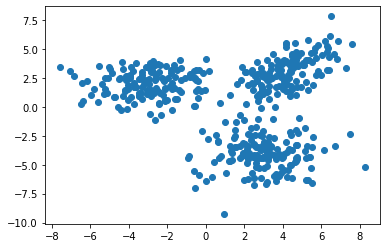

In [549]:
x1 = np.arange(-2,6,0.01)
x2 = np.arange(-7,4,0.01)
X = np.array(np.meshgrid(x1, x2)).reshape(2,len(x1)*len(x2)).T

Mu1 = np.array([4, 3])
Sigma1 = np.array([[1.5,1],[1,2]])
Lambda1 = np.linalg.inv(Sigma1)
y1 = multivariate_normal.rvs(Mu1, np.linalg.inv(Lambda1), size=150)

Mu2 = np.array([-3, 2])
Sigma2 = np.array([[2,1],[2,-1]])
Lambda2 = np.linalg.inv(Sigma2)
y2 = multivariate_normal.rvs(Mu2, np.linalg.inv(Lambda2), size=150)

Mu3 = np.array([3, -4])
Sigma3 = np.array([[2,1],[-2,1.5]])
Lambda3 = np.linalg.inv(Sigma3)
y3 = multivariate_normal.rvs(Mu3, np.linalg.inv(Lambda3), size=150)

y = np.concatenate([y1,y2,y3])

plt.scatter(y[:,0],y[:,1])

lambda: [14.69538376  4.5536627 ]
pi: [[0.48487632 0.51512368]]


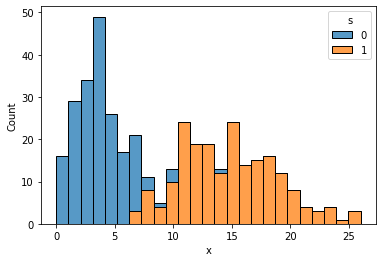

In [552]:
# 初期値の設定
mu = np.array([[1,0],
               [0,1],
               [1,-1]])

Lmd = np.array([[[1,2],[2,1]],
                [[1,2],[2,1]],
                [[1,2],[2,1]]])

pi = np.array([[0.3,0.3,0.4]])

for _ in range(100):
    eta = np.exp(x*np.log(lmd)-lmd+np.log(pi))
    eta = eta / eta.sum(axis=1).reshape(-1,1)
    s = np.array([multinomial.rvs(n=1, p=eta[i]) for i in np.arange(len(eta))])

    a = np.sum(s*x, axis=0) + a
    b = np.sum(s, axis=0) + b
    lmd = gamma.rvs(a=a, scale=1/b)

    alpha = np.sum(s, axis=0) + alpha
    pi = dirichlet.rvs(alpha=alpha[0])

print('lambda:', lmd)    
print('pi:', pi)    

x_df = pd.DataFrame({'x':x.ravel(),'s':s[:,0].ravel()})
sns.histplot(data=x_df, x="x", hue="s", multiple="stack", bins=25);

#### 変分理論
次のように潜在変数とパラメータを分けて近似すると計算効率の良いアルゴリズムが導ける。
$$
p(\boldsymbol{S},\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi}|\boldsymbol{X})\approx q(\boldsymbol{S})q(\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi})
$$
$q(\boldsymbol{S})$に対して変分推論の公式を当てはめる。
$$
\begin{align}
\ln q(\boldsymbol{S})&=\langle \ln p(\boldsymbol{X},\boldsymbol{S},\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi}) \rangle_{q(\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi})}+const.\\
&=\langle\ln p(\boldsymbol{X}|\boldsymbol{S},\boldsymbol{\mu},\boldsymbol{\Lambda}) \rangle_{q(\boldsymbol{\mu},\boldsymbol{\Lambda})} + \langle\ln p(\boldsymbol{S}|\boldsymbol{\pi}) \rangle_{q(\boldsymbol{\pi})}+const.\\
&=\sum_{n=1}^N\{\langle\ln p(\boldsymbol{x}_n|\boldsymbol{s}_n,\boldsymbol{\mu},\boldsymbol{\Lambda}) \rangle_{q(\boldsymbol{\mu},\boldsymbol{\Lambda})}+\langle\ln p(\boldsymbol{s}_n|\boldsymbol{\pi}) \rangle_{q(\boldsymbol{\pi})} \}
\end{align}+const.
$$
ある$\boldsymbol{s}_n$にのみ注目して計算を進めると
$$
\begin{align}
\langle\ln p(\boldsymbol{x}_n|\boldsymbol{s}_n,\boldsymbol{\mu},\boldsymbol{\Lambda}) \rangle_{q(\boldsymbol{\mu},\boldsymbol{\Lambda})}&=\sum_{k=1}^K\langle s_{n,k}\ln N(\boldsymbol{x}_n|\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k^{-1}) \rangle_{q(\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k)}\\
&=\sum_{k=1}^Ks_{n,k}\{-\frac{1}{2}\boldsymbol{x}_n^T\langle \boldsymbol{\Lambda}_k\rangle\boldsymbol{x}_n+\boldsymbol{x}_n^T\langle \boldsymbol{\Lambda}_k\boldsymbol{\mu}_k \rangle -\frac{1}{2}\langle\boldsymbol{\mu}_k^T\boldsymbol{\Lambda}_k\boldsymbol{\mu}_k \rangle + \langle \ln|\boldsymbol{\Lambda}_k| \rangle \}+const.
\end{align}
$$
および
$$
\begin{align}
\langle\ln p(\boldsymbol{s}_n|\boldsymbol{\pi}) \rangle_{q(\boldsymbol{\pi})}&=\langle\ln Cat(\boldsymbol{s}_n|\boldsymbol{\pi}) \rangle_{q(\boldsymbol{\pi})}\\
&=\sum_{k=1}^Ks_{n,k}\langle\ln \pi_k \rangle
\end{align}
$$
が得られる。2つを合わせれば$\boldsymbol{s}_n$に対する近似分布は次のカテゴリ分布をして表すことができる。
$$
q(\boldsymbol{s}_n)=Cat(\boldsymbol{s}_n|\boldsymbol{\eta}_n)\\
ただし\eta_{n,k}\propto \exp\{-\frac{1}{2}\boldsymbol{x}_n^T\langle \boldsymbol{\Lambda}_k\rangle\boldsymbol{x}_n+\boldsymbol{x}_n^T\langle \boldsymbol{\Lambda}_k\boldsymbol{\mu}_k \rangle -\frac{1}{2}\langle\boldsymbol{\mu}_k^T\boldsymbol{\Lambda}_k\boldsymbol{\mu}_k \rangle + \langle \ln|\boldsymbol{\Lambda}_k| \rangle + \angle \ln\pi_k\rangle\}\\
\bigg(s.t.\ \sum_{k=1}^K\eta_{n,k}=1 \bigg)
$$
パラメータに対する近似分布の更新式を求める。
$$
\begin{align}
\ln q(\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi})&=\langle\ln p(\boldsymbol{X},\boldsymbol{S},\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi}) \rangle_{q(\boldsymbol{S})}+const.\\
&=\langle\ln p(\boldsymbol{X}|\boldsymbol{S},\boldsymbol{\mu},\boldsymbol{\Lambda}) \rangle_{q(\boldsymbol{S})}+\ln p(\boldsymbol{\mu},\boldsymbol{\Lambda})+\langle\ln p(\boldsymbol{S}|\boldsymbol{\pi}) \rangle_{q(\boldsymbol{S})}+\ln p(\boldsymbol{\pi})+const.
\end{align}
$$
はじめに、$\boldsymbol{\mu},\boldsymbol{\Lambda}$に関係する項のみを取り出してみると、
$$
\begin{align}
\ln q(\boldsymbol{\mu},\boldsymbol{\Lambda})&=\sum_{n=1}^N\langle \sum_{k=1}^Ks_{n,k}\ln N(\boldsymbol{x}_n|\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k^{-1})\rangle_{q(s_n)}+\sum_{k=1}^K\ln NW(\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k|\boldsymbol{m},\beta,\nu,\boldsymbol{W})+const.\\
&=\sum_{k=1}^K\{\sum_{n=1}^N\langle s_{n,k}\rangle\ln N(\boldsymbol{x}_n|\boldsymbol{\mu}_k.\boldsymbol{\Lambda}_k^{-1})+\ln NW(\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k|\boldsymbol{m},\beta,\nu,\boldsymbol{W})+const.
\end{align}
$$
となる。したがって、$K$個別々に近似事後分布を計算すればよい。
$$
\ln q(\boldsymbol{\mu}_k|\boldsymbol{\Lambda}_k)=-\frac{1}{2}\{\boldsymbol{\mu}_k^T(\sum_{n=1}^N\langle s_{n,k} \rangle+\beta)\boldsymbol{\Lambda}_k\boldsymbol{\mu}_k-2\boldsymbol{\mu}_k^T(\boldsymbol{\Lambda}_k\sum_{n=1}^N\langle s_{n,k} \rangle \boldsymbol{x}_n+\beta \boldsymbol{\Lambda}_k\boldsymbol{m}) \}+const.
$$
のようにしてまとめることができ、$\boldsymbol{\mu}_k$の近似分布は、$\boldsymbol{\Lambda}_k$の条件が付いた多次元ガウス分布として表せる。
$$
\begin{align}
q(\boldsymbol{\mu}_k|\boldsymbol{\Lambda}_k)&=N(\boldsymbol{\mu}_k|\hat{\boldsymbol{m}}_k,(\hat{\beta}_k\boldsymbol{\Lambda}_k)^{-1})\\
ただし\hat{\beta}_k&=\sum_{n=1}^N\langle s_{n,k} \rangle + \beta\\
\hat{\boldsymbol{m}}_k&=\frac{\sum_{n=1}^N\langle s_{n,k} \rangle\boldsymbol{x}_n+\beta\boldsymbol{m}}{\hat{\beta}_k}
\end{align}
$$
次に$q(\boldsymbol{\Lambda})$を求める。
$$
\ln q(\boldsymbol{\Lambda})=\ln q(\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k)-\ln q(\boldsymbol{\mu}_k|\boldsymbol{\Lambda}_k)
$$
が成り立つので、いま求めた$q(\boldsymbol{\mu}_k|\boldsymbol{\Lambda}_k)$を代入することによって
$$
\ln q(\boldsymbol{\Lambda}_k)=\frac{\sum_{n=1}^N\langle s_{n,k} \rangle +\nu + D - 1}{2}\ln |\boldsymbol{\Lambda}_k|-\frac{1}{2}Tr\{ (\sum_{n=1}^N\langle s_{n,k} \rangle \boldsymbol{x}_n\boldsymbol{x}_n^T+\beta\boldsymbol{m}\boldsymbol{m}^T-\hat{\beta}_k\hat{\boldsymbol{m}}_k\hat{\boldsymbol{m}}_k^T+\boldsymbol{W}^{-1})\boldsymbol{\Lambda}_k\}+const.
$$
のように整理できる。したがって、$\boldsymbol{\Lambda}_k$の近似事後分布は次のようなウィシャート分布として求めることができる。
$$
q(\boldsymbol{\Lambda}_k)= W(\boldsymbol{\Lambda}_k|\hat{\nu}_k,\hat{\boldsymbol{W}}_k)\\
ただし\hat{\boldsymbol{W}}_k^{-1}=\sum_{n=1}^N\langle s_{n,k}\rangle \boldsymbol{x}_n\boldsymbol{x}_n^T+\beta\boldsymbol{m}\boldsymbol{m}^T-\hat{\beta}_k\hat{\boldsymbol{m}}_k\hat{\boldsymbol{m}}_k^T+\boldsymbol{W}^{-1}\\
\hat{\nu}_k=\sum_{n=1}^N\langle s_{n,k}\rangle+\nu
$$
パラメータの近似事後分布$q(\boldsymbol{\mu},\boldsymbol{\Lambda})=q(\boldsymbol{\mu}|\boldsymbol{\Lambda})q(\boldsymbol{\Lambda})$が、事前分布と同じ独立な$K$個のガウス・ウィシャート分布として求められる。
$\boldsymbol{\pi}$の近似事後分布は$\langle\ln p(\boldsymbol{S}|\boldsymbol{\pi}) \rangle_{q(\boldsymbol{S})}+\ln p(\boldsymbol{\pi})$から計算できるので、これはポアソン混合モデルで得た式がそのまま使える。
更新式に必要になる期待値は次のようになる。
$$
\begin{align}
\langle\boldsymbol{\Lambda}_k \rangle&=\hat{\nu}_k\hat{\boldsymbol{W}}_k\\
\langle\ln|\boldsymbol{\Lambda}_k| \rangle&=\sum_{d=1}^D\phi(\frac{\hat{\nu}_k+1-d}{2})+D\ln 2+\ln|\hat{\boldsymbol{W}}_k|\\
\langle\boldsymbol{\Lambda}_k\boldsymbol{\mu}_k \rangle&=\hat{\nu}_k\hat{\boldsymbol{W}}_k\hat{\boldsymbol{m}}_k\\
\langle\boldsymbol{\mu}_k^T\boldsymbol{\Lambda}_k\boldsymbol{\mu}_k \rangle&=\hat{\nu}_k\hat{\boldsymbol{m}}_k^T\hat{\boldsymbol{W}}_k\hat{\boldsymbol{m}}_k+\frac{D}{\hat{\beta}_k}
\end{align}
$$

ガウス混合モデルの変分推論のアルゴリズムは次のようになる。

$q(\boldsymbol{\mu},\boldsymbol{\Lambda}),q(\boldsymbol{\pi})$を初期化  
for $i=1,\cdots,MAXITER$ do  
　for $n=1,\cdots,N$ do  
　　$q(\boldsymbol{s}_n$)を更新 
　end for  
　for $k=1,\cdots,K$ do  
　　$q(\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k)$を更新
　end for  
　$q(\boldsymbol{\pi})$を更新
end for
　

#### 崩壊型ギブスサンプリング
ガウス混合モデルからすべてのパラメータ$\boldsymbol{\mu},\boldsymbol{\Lambda}$および$\boldsymbol{\pi}$を周辺化除去したモデルを考える。
$$
p(\boldsymbol{X},\boldsymbol{S})=\int\int\int p(\boldsymbol{X},\boldsymbol{S},\boldsymbol{\mu},\boldsymbol{\Lambda},\boldsymbol{\pi})d\boldsymbol{\mu}d\boldsymbol{\Lambda}d\boldsymbol{\pi}
$$
$\boldsymbol{S}_{\backslash n}$がすでにサンプルされたものと仮定して$\boldsymbol{s}_n$を新たにサンプルするための手続きを計算する。
$\boldsymbol{s}_n$に関する事後分布は、次のような2つの項に分けて書くことができる。
$$
p(\boldsymbol{s}_n|\boldsymbol{X},\boldsymbol{S}_{\backslash n})\propto p(\boldsymbol{x}_n|\boldsymbol{X}_{\backslash n},\boldsymbol{s}_n,\boldsymbol{S}_{\backslash n})p(\boldsymbol{s}_n|\boldsymbol{S}_{\backslash n})
$$
$p(\boldsymbol{s}_n|\boldsymbol{S}_{\backslash n})$に関してはポアソン混合モデルで得られた式の結果を再度使用する。
$p(\boldsymbol{x}_n|\boldsymbol{X}_{\backslash n},\boldsymbol{s}_n,\boldsymbol{S}_{\backslash n})$は、次のような周辺化によって書き直すことができる。
$$
p(\boldsymbol{x}_n|\boldsymbol{X}_{\backslash n},\boldsymbol{s}_n,\boldsymbol{S}_{\backslash n})=\int\int p(\boldsymbol{x}_n|\boldsymbol{s}_n,\boldsymbol{\mu},\boldsymbol{\Lambda})p(\boldsymbol{\mu},\boldsymbol{\Lambda}|\boldsymbol{X}_{\backslash n},\boldsymbol{S}_{\backslash n})d\boldsymbol{\mu}d\boldsymbol{\Lambda}
$$
右辺の$p(\boldsymbol{\mu},\boldsymbol{\Lambda}|\boldsymbol{X}_{\backslash n},\boldsymbol{S}_{\backslash n})$は次のように計算できる。
$$
p(\boldsymbol{\mu},\boldsymbol{\Lambda}|\boldsymbol{X}_{\backslash n}\boldsymbol{S}_{\backslash n})\propto p(\boldsymbol{X}_{\backslash n}|\boldsymbol{S}_{\backslash n},\boldsymbol{\mu},\boldsymbol{\Lambda})p(\boldsymbol{\mu},\boldsymbol{\Lambda})
$$
事後分布の計算は、ギブスサンプリングの式を流用すれば、次のようなガウス・ウィシャート分布が事後分布として得られる。
$$
\begin{align}
p(\boldsymbol{\mu},\boldsymbol{\Lambda}|\boldsymbol{X}_{\backslash n}\boldsymbol{S}_{\backslash n})&=\prod_{k=1}^KN(\boldsymbol{\mu}_k|\hat{\boldsymbol{m}}_{\backslash n,k},(\hat{\beta}_{\backslash n,k}\boldsymbol{\Lambda}_k)^{-1})W(\boldsymbol{\Lambda}_k|\hat{\nu}_{\backslash n,k},\hat{W}_{\backslash n,k})\\
\hat{\beta}_{\backslash n,k}&=\sum_{n'\neq n}s_{n',k}+\beta\\
\hat{\boldsymbol{m}}_{\backslash n,k}&=\frac{\sum_{n'\neq n}s_{n',k}\boldsymbol{x}_{n'}+\beta\boldsymbol{m}}{\hat{\beta}_{\backslash n,k}}\\
\hat{\boldsymbol{W}}_{\backslash n,k}^{-1}&=\sum_{n'\neq n}s_{n',k}\boldsymbol{x}_{n'}\boldsymbol{x}_{n'}^T+\beta\boldsymbol{m}\boldsymbol{m}^T-\hat{\beta}_{\backslash n,k}\hat{\boldsymbol{m}}_{\backslash n,k}\hat{\boldsymbol{m}}_{\backslash n,k}^T+\boldsymbol{W}^{-1}\\
\hat{\nu}_{\backslash n,k}&=\sum_{n'\neq n}s_{n',k}+\nu
\end{align}
$$

周辺化については、ある$k$に対して$s_{n,k}=1$である特別な場合を考えれば、次のような多次元スチューデントの$t$分布による表現が得られる。
$$
\begin{align}
p(\boldsymbol{x}_n|\boldsymbol{X}_{\backslash n},s_{n,k}=1,\boldsymbol{S}_{\backslash n})&=\int\int p(\boldsymbol{x}_n|\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k)p(\boldsymbol{\mu}_k,\boldsymbol{\Lambda}_k|\boldsymbol{X}_{\backslash n},\boldsymbol{S}_{\backslash n})d\boldsymbol{\mu}_kd\boldsymbol{\Lambda}_k\\
&=St(\boldsymbol{x}_n|\hat{\boldsymbol{m}}_{\backslash n,k},\frac{(1-D+\hat{\nu}_{\backslash n,k})\hat{\beta}_{\backslash n,k}}{1+\hat{\beta}_{\backslash n,k}}\hat{\boldsymbol{W}}_{\backslash n,k},1-D+\hat{\nu}_{\backslash n,k})
\end{align}
$$

実装上ではガウス・ウィシャート分布のパラメータに関する更新式は次のように書きなおすことができる。
$$
\begin{align}
\hat{\beta}_{\backslash j,k}&=\hat{\beta}_{\backslash i,k}+s_{i,k}-s_{j,k}\\
\hat{\boldsymbol{m}}_{\backslash j,k}&=\frac{\hat{\beta}_{\backslash i,k}\hat{\boldsymbol{m}}_{\backslash i,k}+s_{i,k}\boldsymbol{x}_i-s_{j,k}\boldsymbol{x}_j}{\hat{\beta}_{\backslash j,k}}\\
\hat{\boldsymbol{W}}_{\backslash}^{-1}&=\hat{\boldsymbol{W}}_{\backslash i,k}^{-1}*\frac{s_{i,k}(\boldsymbol{x}_i-\boldsymbol{m})(\boldsymbol{x}_i-\boldsymbol{m})^T}{\hat{\beta}_{\backslash i,k}}-\frac{s_{j,k}(\boldsymbol{x}_j-\boldsymbol{m})(\boldsymbol{x}_j-\boldsymbol{m})^T}{\hat{\beta}_{\backslash j,k}}\\
\hat{\nu}_{\backslash j,k}&=\hat{\nu}_{\backslash i,k}+s_{i,k}-s_{j,k}
\end{align}
$$

ここではパラメータ$\boldsymbol{W}_k^{-1}$を更新するようなアルゴリズムを作ったが、途中で必要な尤度計算を行うためには$\boldsymbol{W}_k$が必要となる。効率よく$\boldsymbol{W}_k$を更新するためにはランク1公式(シャーマン-モリソンの公式)
$$
(\boldsymbol{A}+\boldsymbol{b}\boldsymbol{c}^T)^{-1}=\boldsymbol{A}^{-1}-\frac{\boldsymbol{A}^{-1}\boldsymbol{b}\boldsymbol{c}^T\boldsymbol{A}^{-1}}{1+\boldsymbol{c}^T\boldsymbol{A}^{-1}\boldsymbol{b}}
$$
を応用する。

ガウス混合モデルに対する崩壊型ギブスサンプリングのアルゴリズムは次のようになる。

潜在変数のサンプル$\boldsymbol{s}_1,\cdots,\boldsymbol{s}_N$に初期値を設定  
$\hat{\beta},\hat{\boldsymbol{m}},\hat{\boldsymbol{W}},\hat{\nu}$を計算
for $i=1,\cdots,MAXITER$ do  
　for $n=1,\cdots,N$ do  
　　$x_n$に関する統計量を除去  
　　for $k=1,\cdots,K$ do  
　　　$p(\boldsymbol{x}_n\mid \boldsymbol{X}_{\backslash n},s_{n,k}=1,\boldsymbol{S}_{\backslash n})$を計算  
　　end for  
　　$p(\boldsymbol{s}_n\mid \boldsymbol{S}_{\backslash n})$および$p(x_n\mid \boldsymbol{X}_{\backslash n},\boldsymbol{s}_n,\boldsymbol{S}_{\backslash n})$を用いて$\boldsymbol{s}_n$をサンプル  
　　$x_n$に関する統計量を追加  
　end for  
end for